In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from tabulate import tabulate
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from scipy import interp
from sklearn.model_selection import KFold

import plotly.plotly as py
import plotly.figure_factory as ff

In [57]:
NUHdata = pd.read_csv("NUH_HM data.csv", index_col=0)
NUHdata.columns

Index(['ICU ADMISSION', 'ICU DISCHARGE', 'DOB', 'age', 'gender', 'WEIGHT',
       'BMI', 'hypertension', 'congestive_heart_failure', 'IHD',
       'cardiac_arrhythmias', 'VTE', 'STROKE', 'HYPERLIPID', 'ASTHMA',
       'chronic_pulmonary', 'EPILEPSY', 'depression', 'ANIXETY DISORDER',
       'diabetes_uncomplicated', 'hypothyroidism', 'NEPHROTIC SYNDROME',
       'NEPHRITIC SYNDROME', 'renal_failure', 'rheumatoid_arthritis', 'OA',
       'GOUT', 'liver_disease', 'peptic_ulcer', 'GERD', 'IBD',
       'ICU ADMISSION TIME', 'ICU DISCHARGE TIME', 'LENGTH OF ICU STAY',
       'mort_icu', 'mort_hosp', 'Death Time', 'DATE OF DISCHARGE',
       'DURATION OF HOSPITAL ADMISSION', 'HM _TYPE', 'leukemia', 'lymphoma',
       'myeloma', 'myelodysplastic_syndrome', 'rbc_1', 'platelet_1',
       'NEUTROPENIA', 'wbc', 'hemoglobin', 'platelet', 'sodium', 'potassium',
       'UREA', 'creatinine', 'bilirubin', 'ast', 'alt', 'abg_ph', 'abg_pco2',
       'abg_po2', 'abg_bicarbonate', 'STANDARD BICARB', 'abg_

In [64]:
NUHdata = pd.read_csv("NUH_HM data.csv", index_col=0)
NUHdata[['p_blood_culture_1', 'rbc_1', 'platelet_1', 'vasopressor_1', 
      'ventilation_1','leukaemia','lymphoma','myelodysplastic_syndrome',
      'myeloma']] = NUHdata[['p_blood_culture_1', 'rbc_1', 'platelet_1', 'vasopressor_1', 'ventilation_1',
                          'leukemia','lymphoma','myelodysplastic_syndrome','myeloma']].fillna(0)

NUHdf = pd.DataFrame(NUHdata, columns =[
                                  'age', 
    
                                  'sofa','wbc','hemoglobin','platelet','sodium','potassium','creatinine','urea',
                                  'bilirubin',
                                  'ast', 
                                  'alt',
                                  'abg_ph', 'abg_pco2', 
                                  #'abg_po2', 
                                  'abg_bicarbonate','abg_baseexcess',
                                  #'abg_spo2', 
                                  'abg_lactate',
                                  'gender',
                                  'p_blood_culture_1',
                                  'rbc_1', 'platelet_1','ventilation_1','vasopressor_1', 'rrt',
                                  #'hypertension', 'congestive_heart_failure', 'cardiac_arrhythmias', 'chronic_pulmonary',
                                  #'depression', 'diabetes_uncomplicated', 'hypothyroidism',
                                  #'renal_failure', 'rheumatoid_arthritis', 'liver_disease','peptic_ulcer',
                                  #'leukemia','lymphoma','myeloma','myelodysplastic_syndrome',
                                  'mort_icu',
                                  'mort_hosp'
                                ])


NUHdf['gender'] = NUHdf['gender'].str.replace('Male','1')
NUHdf['gender'] = NUHdf['gender'].str.replace('Female','0')
NUHdf=NUHdf.fillna(NUHdf.median())
#NUHdf=NUHdf.dropna(axis = 0, how='any')


NUH_X = pd.DataFrame(NUHdf,columns =[
                              'age', 
                              'sofa','wbc','hemoglobin','platelet','sodium','potassium','creatinine','urea',
                              'bilirubin',
                              'ast', 
                              'alt',
                              'abg_ph', 'abg_pco2', 
                              #'abg_po2', 
                              'abg_bicarbonate','abg_baseexcess', 
                              #'abg_spo2', 
                              'abg_lactate',
                              'gender',
                              'p_blood_culture_1',
                              'rbc_1', 
                              'platelet_1','ventilation_1','vasopressor_1', 'rrt',
                              #'hypertension', 'congestive_heart_failure', 'cardiac_arrhythmias', 'chronic_pulmonary',
                              #'depression', 'diabetes_uncomplicated', 'hypothyroidism',
                              #'renal_failure', 'rheumatoid_arthritis', 'liver_disease','peptic_ulcer',
                              #'leukemia','lymphoma','myeloma','myelodysplastic_syndrome'
                                 ])

NUH_y = pd.DataFrame(NUHdf,columns =['mort_icu'])
#NUH_y = pd.DataFrame(NUHdf,columns =['mort_hosp'])

In [96]:
# #############################################################################
# Load data

data = pd.read_csv("HM_cohort_wth_LabTest.csv", index_col=0)
data['urea'] = data['bun']
data.loc[:,'leukemia'] = pd.Series(1, index=data.index[data['d_type']=='leukemia'])
data.loc[:,'lymphoma'] = pd.Series(1, index=data.index[data['d_type']=='lymphoma'])
data.loc[:,'myeloma'] = pd.Series(1, index=data.index[data['d_type']=='myeloma'])
data.loc[:,'myelodysplastic_syndrome'] = pd.Series(1, index=data.index[data['d_type']=='myelodysplastic_syndrome'])
data[['p_blood_culture_1', 'rbc_1', 'platelet_1', 'vasopressor_1', 
      'ventilation_1','leukemia','lymphoma','myelodysplastic_syndrome',
      'myeloma']] = data[['p_blood_culture_1', 'rbc_1', 'platelet_1', 'vasopressor_1', 'ventilation_1',
                          'leukemia','lymphoma','myelodysplastic_syndrome','myeloma']].fillna(0)    

df = pd.DataFrame(data, columns =['age', 'sofa','wbc','hemoglobin','platelet','sodium','potassium','creatinine',
                                  'urea',
                                  'bilirubin',
                                  'ast',
                                  'alt',
                                  'abg_ph', 'abg_pco2', 
                                  #'abg_po2', 
                                  'abg_bicarbonate','abg_baseexcess', 
                                  #'abg_spo2', 
                                  'abg_lactate',
                                  'gender',
                                  'p_blood_culture_1',
                                  'rbc_1', 'platelet_1','ventilation_1','vasopressor_1', 'rrt',
                                  #'hypertension', 'congestive_heart_failure', 'cardiac_arrhythmias', 'chronic_pulmonary',
                                  #'depression', 'diabetes_uncomplicated', 'hypothyroidism',
                                  #'renal_failure', 'rheumatoid_arthritis', 'liver_disease','peptic_ulcer',
                                  #'leukemia','lymphoma','myeloma','myelodysplastic_syndrome',
           
                                  'mort_icu',
                                  'mort_hosp'
                                  
                                ])


df['gender'] = df['gender'].str.replace('M','1')
df['gender'] = df['gender'].str.replace('F','0')
#concert the unit for creatinine from mg/dl to umol/l
df['creatinine']=df['creatinine']*88.42
#convert the unit for bilirubin from mg/dl to umol/l
df['bilirubin']=df['bilirubin']*17.1
#convert the unit for BUN (urea) from mg/dL to mmol/L
df['urea']=df['urea']*0.3571


#df=df.dropna(axis = 0, how='any')
df=df.fillna(df.median())


mimic_X = pd.DataFrame(df,columns =[
                              'age', 
                              'sofa','wbc','hemoglobin','platelet','sodium','potassium','creatinine','urea',
                              'bilirubin',
                              'ast',
                              'alt',
                              'abg_ph', 'abg_pco2', 
                              #'abg_po2', 
                              'abg_bicarbonate','abg_baseexcess', 
                              #'abg_spo2', 
                              'abg_lactate',
                              'gender',
                              'p_blood_culture_1', 
                              'rbc_1', 
                              'platelet_1','ventilation_1','vasopressor_1', 'rrt'
                              #'hypertension', 'congestive_heart_failure', 'cardiac_arrhythmias', 'chronic_pulmonary',
                              #'depression', 'diabetes_uncomplicated', 'hypothyroidism',
                              #'renal_failure', 'rheumatoid_arthritis', 'liver_disease','peptic_ulcer',
                              #'leukemia','lymphoma','myeloma','myelodysplastic_syndrome'
                                 ])

mimic_y = pd.DataFrame(df,columns =['mort_icu'])
#mimic_y = pd.DataFrame(df,columns =['mort_hosp'])

10-fold Cross Validation AUC: 0.862 (+/- 0.044)
Model: [[  1.47940207e-03   2.03911055e-01   8.20388122e-03   2.35097330e-03
    1.23866283e-03  -2.33014733e-02   2.02347228e-01  -6.73858310e-03
    4.76978686e-02  -2.91888015e-03   6.30546970e-04  -6.57509275e-04
    0.00000000e+00  -9.81700259e-03  -7.14042641e-02   5.06332280e-03
    1.51895904e-01  -2.49072305e-01  -2.87990716e-01   0.00000000e+00
    5.82061236e-02   1.36560991e+00   1.18578761e+00   3.99733257e-02]]
Final modal AUC: 0.768 


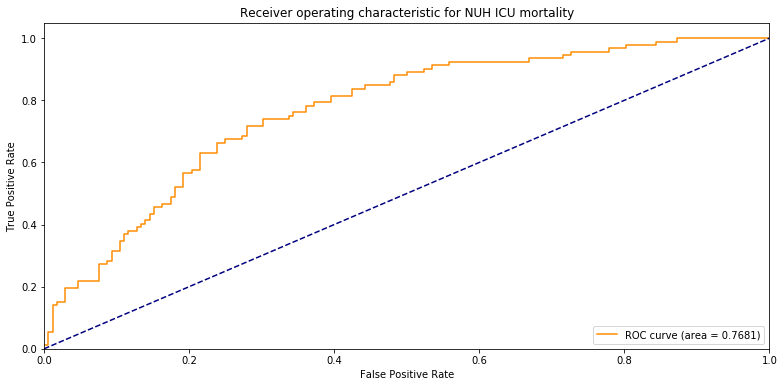

In [97]:
#X, y = shuffle(mimic_X, mimic_y)
X = np.array(mimic_X)
y = np.ravel(mimic_y)
n_samples, n_features = X.shape
#mimic_X = np.array(mimic_X)
#mimic_y = np.ravel(mimic_y)
NUH_X = np.array(NUH_X)
NUH_y = np.ravel(NUH_y)


# shuffle and split training and test sets
coefs_=[]
score =[]
y_tests = []


kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
    classifier.fit(X_train, y_train)
    predictions = classifier.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    score.append(roc_auc.ravel().copy())


score=np.array(score)
print("10-fold Cross Validation AUC: %0.3f (+/- %0.3f)" % (score.mean(), score.std()))

#X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, 
#                                                                            test_size=0.3,
#                                                                            random_state=7)
#Final Module
classifier = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
classifier.fit(X, y)
y_score = classifier.decision_function(NUH_X)
beta = np.array(classifier.coef_)
print("Model:", beta)

# odd ratio
odd_r = np.exp(beta).transpose().ravel()
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = metrics.roc_curve(NUH_y, y_score)
#fpr, tpr, thresholds = metrics.roc_curve(y, y_score)

roc_auc = auc(fpr, tpr)
print("Final modal AUC: %0.3f " % roc_auc)
plt.figure(figsize=(13,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for NUH ICU mortality')
plt.legend(loc="lower right")
plt.show()


In [98]:
columns=['age','sofa score','wbc','hemoglobin','platelet','sodium','potassium','urea','creatinine','bilirubin',
         'ast', 'alt','abg_ph', 'abg_pco2', 
         #'abg_po2', 
         'abg_bicarbonate','abg_baseexcess', 
         #'abg_spo2', 
         'abg_lactate',
         'Male sex','positive blood culture', 'RBC transfusion', 'Platelet transfusion','ventilation','vasopressor', 'renal replacement',
         #'hypertension', 'congestive_heart_failure', 'cardiac_arrhythmias', 'chronic_pulmonary',
         #'depression', 'diabetes_uncomplicated', 'hypothyroidism',
         #'renal_failure', 'rheumatoid_arthritis', 'liver_disease','peptic_ulcer',
         #'leukemia','lymphoma','myeloma','myelodysplastic_syndrome'
         ]
features = np.asarray(columns).transpose()
featureslist=[
              'age (median [IQR])','sofa (median [IQR])','wbc (median [IQR])','hemoglobin (median [IQR])','platelet (median [IQR])',
              'sodium (median [IQR])','potassium (median [IQR])','urea (median [IQR])','creatinine (median [IQR])','bilirubin (median [IQR])',
              'ast (median [IQR])','alt (median [IQR])','abg_ph (median [IQR])','abg_pco2 (median [IQR])',
              #'abg_po2 (median [IQR])',
              'abg_bicarbonate (median [IQR])','abg_baseexcess (median [IQR])',
              #'abg_spo2 (median [IQR])',
              'abg_lactate (median [IQR])',
              'gender (n (%))',
              'p_blood_culture_1 (n (%))','rbc_1 (n (%))','platelet_1 (n (%))','ventilation_1 (n (%))',
              'vasopressor_1 (n (%))','rrt (n (%))'
              #'hypertension (n (%))','congestive_heart_failure (n (%))',
              #'cardiac_arrhythmias (n (%))','chronic_pulmonary (n (%))','depression (n (%))','diabetes_uncomplicated (n (%))',
              #'hypothyroidism (n (%))',
              #'renal_failure (n (%))','rheumatoid_arthritis (n (%))','liver_disease (n (%))','peptic_ulcer (n (%))',
              #'leukemia (n (%))','lymphoma (n (%))','myeloma (n (%))','myelodysplastic_syndrome (n (%))'
              ]
#select p_values for the features

tableone_mimic=pd.read_csv('tableone_result.csv', index_col=0)
df1=pd.DataFrame(tableone_mimic)
mimic_p_value = df1.iloc[[i for i,x in enumerate(df1.index) for j in featureslist if x == j ]]['0']

tableone_nuh=pd.read_csv('tableone_result_NUH.csv', index_col=0)
df2=pd.DataFrame(tableone_nuh)
nuh_p_value  = df2.iloc[[i for i,x in enumerate(df2.index) for j in featureslist if x == j ]]['0']

data_matrix = np.column_stack((features,odd_r,mimic_p_value,nuh_p_value))
title = np.asarray(['Features','Odd Ratio','mimic P-value','NUH P-value'])
table = np.vstack((title,data_matrix))
print (tabulate(table))

----------------------  ------------------  --------------------  --------------------
Features                Odd Ratio           mimic P-value         NUH P-value
age                     1.0014804969249205  0.5579999999999999    0.99
sofa score              1.2261890846557295  0.0                   0.0
wbc                     1.008237625264782   0.075                 0.04
hemoglobin              1.0023537390018986  0.6779999999999999    0.038
platelet                1.001239430291792   0.005                 0.015
sodium                  0.9769679096753507  0.25                  0.42200000000000004
potassium               1.2242730356116842  0.006                 0.82
urea                    0.9932840702427291  0.0                   0.33299999999999996
creatinine              1.0488537157620448  0.019                 0.413
bilirubin               0.9970853756405627  0.001                 0.001
ast                     1.00063074580629    0.037000000000000005  0.006
alt                 

In [99]:
auc_score=[] 

for j in range(1,2):
     for i in range(1,100):
        NUH_X_mix, NUH_X_test, NUH_y_mix, NUH_y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
        #mimic_X_mix, mimic_X_test, mimic_y_mix, mimic_y_test = train_test_split(mimic_X, mimic_y, test_size=0.3, shuffle=True)

        X = np.array(mimic_X)
        y = np.ravel(mimic_y)
        X1, y1 = shuffle(X, y)

        X2 = np.array(X1)
        y2 = np.ravel(y1)

        score=[]
        #X_discard, X_part, y_discard, y_part = train_test_split(X, y, test_size=0.4094)
        X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(NUH_X, NUH_y, 
                                                                                test_size=0.2, shuffle=True
                                                                                    )
        #Final Module
        classifier = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
        classifier.fit(X2, y2)
        y_score = classifier.decision_function(X_test_final)
        #classifier.fit(X_train_final, y_train_final)
        #y_score = classifier.decision_function(X_test_final)   
        fpr, tpr, _ = roc_curve(y_test_final, y_score)
        score.append(auc(fpr, tpr).ravel().copy())
        score=np.array(score)
        auc_score.append(score.mean())
  
     final=np.mean(auc_score)
     print(final)

np.std(auc_score)

0.775759769013


0.061568822871711365

In [ ]:
featureslist=[
              'age (median [IQR])','sofa (median [IQR])','wbc (median [IQR])','hemoglobin (median [IQR])','platelet (median [IQR])',
              'sodium (median [IQR])','potassium (median [IQR])','urea (median [IQR])','creatinine (median [IQR])','gender (n (%))',
              'p_blood_culture_1 (n (%))','rbc_1 (n (%))','platelet_1 (n (%))','ventilation_1 (n (%))',
              'vasopressor_1 (n (%))','rrt (n (%))',
              'hypertension (n (%))','congestive_heart_failure (n (%))',
              'cardiac_arrhythmias (n (%))','chronic_pulmonary (n (%))','depression (n (%))','diabetes_uncomplicated (n (%))',
              'hypothyroidism (n (%))','renal_failure (n (%))','rheumatoid_arthritis (n (%))','liver_disease (n (%))','peptic_ulcer (n (%))'
              ]



p_values=df1.iloc[[i for i,x in enumerate(df1.index) for j in featureslist if x == j ]]['0']